<a href="https://colab.research.google.com/github/Salma-Arif/Intrusion-Detection/blob/main/Intrusion_Detection_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-profiling numpy matplotlib seaborn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 18.5 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn --upgrade --quiet

In [ ]:
#hide
pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Train_data.csv to Train_data.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier


In [ ]:
raw_df = pd.read_csv('Train_data.csv')
raw_df.head(20)

,duration,protocol_type,service,flag,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,...,0.00,0.05,0.00,normal
1,0,udp,45,2,...,0.00,0.00,0.00,normal
2,0,icmp,50,4,...,1.00,0.00,0.00,dos
3,0,icmp,25,2,...,0.01,0.00,0.01,normal
4,0,icmp,25,2,...,0.00,0.00,0.00,normal
5,0,icmp,50,1,...,0.00,1.00,1.00,dos
6,0,icmp,50,4,...,1.00,0.00,0.00,dos
7,0,icmp,50,4,...,1.00,0.00,0.00,dos
8,0,icmp,52,4,...,1.00,0.00,0.00,dos
9,0,icmp,50,4,...,1.00,0.00,0.00,dos


In [ ]:
raw_df.describe()

,duration,service,flag,src_bytes,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,125973.000000,125973.000000,1.259730e+05,...,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,32.086288,2.575179,4.556674e+04,...,0.284452,0.278485,0.118832,0.120240
std,2604.51531,16.462574,1.141552,5.870331e+06,...,0.444784,0.445669,0.306557,0.319459
min,0.00000,1.000000,1.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000
25%,0.00000,20.000000,2.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000
50%,0.00000,25.000000,2.000000,4.400000e+01,...,0.000000,0.000000,0.000000,0.000000
75%,0.00000,50.000000,4.000000,2.760000e+02,...,1.000000,1.000000,0.000000,0.000000
max,42908.00000,70.000000,11.000000,1.379964e+09,...,1.000000,1.000000,1.000000,1.000000


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  int64  
 3   flag                         125973 non-null  int64  
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
raw_df['protocol_type'].unique()

array(['icmp', 'udp', 'tcp'], dtype=object)

In [ ]:
|sizes = 'icmp', 'udp', 'tcp'

SyntaxError: ignored

In [ ]:
raw_df['protocol_type']

0         icmp
1          udp
2         icmp
3         icmp
4         icmp
          ... 
125968    icmp
125969     udp
125970    icmp
125971    icmp
125972    icmp
Name: protocol_type, Length: 125973, dtype: object

In [ ]:
# Split the input and target data into training and validation sets
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [ ]:
train_df.shape, val_df.shape, test_df.shape

((75583, 42), (25195, 42), (25195, 42))

**Input and Target Columns.**

In [ ]:
input_cols = list(raw_df.columns)[1:-1]
target_col = 'xAttack'

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs =  val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [ ]:
# To identify numerical and categorical columns
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
print(numerical_cols)

['service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [ ]:
print(categorical_col)

NameError: ignored

**Scaling Numeric Features**

In [ ]:
# No missing values so, there is no need to impute numerical columns.
# Let's scale numerical features

scaler = MinMaxScaler().fit(raw_df[numerical_cols])

In [ ]:
train_inputs[numerical_cols] = scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])

In [ ]:
# Let's check minimum and maximum value after scaling.
val_inputs.describe().loc[['min', 'max']]

,service,flag,src_bytes,dst_bytes,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
min,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,0.003932,...,1.0,1.0,1.0,1.0


**Encoding Categorical Data**

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
train_inputs

,protocol_type,service,flag,src_bytes,...,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
112923,icmp,0.347826,0.1,1.586998e-07,...,0.0,1.0,0.0,0.0
62114,udp,0.159420,0.1,3.188489e-08,...,0.0,0.0,0.0,1.0
24430,icmp,0.405797,0.3,0.000000e+00,...,0.0,1.0,0.0,0.0
103010,tcp,0.217391,0.1,3.768215e-07,...,0.0,0.0,1.0,0.0
48968,icmp,0.913043,0.2,0.000000e+00,...,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
86770,icmp,0.710145,0.0,0.000000e+00,...,1.0,1.0,0.0,0.0
18942,udp,0.637681,0.1,7.246566e-10,...,0.0,0.0,0.0,1.0
111898,icmp,0.347826,0.1,1.702943e-07,...,0.0,1.0,0.0,0.0
26554,udp,0.159420,0.1,3.333421e-08,...,0.0,0.0,0.0,1.0


In [ ]:
X_train = train_inputs[numerical_cols + encoded_cols]
X_val = val_inputs[numerical_cols + encoded_cols]
X_test = test_inputs[numerical_cols + encoded_cols]

In [ ]:
X_test

,service,flag,src_bytes,dst_bytes,...,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
378,0.159420,0.1,2.608764e-08,0.000000e+00,...,0.0,0.0,0.0,1.0
32038,0.347826,0.3,0.000000e+00,0.000000e+00,...,0.0,1.0,0.0,0.0
86399,0.681159,0.3,0.000000e+00,0.000000e+00,...,0.0,1.0,0.0,0.0
74412,0.710145,0.0,0.000000e+00,0.000000e+00,...,1.0,1.0,0.0,0.0
52951,0.710145,0.4,0.000000e+00,0.000000e+00,...,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
114267,0.347826,0.1,1.442067e-07,7.206451e-07,...,0.0,1.0,0.0,0.0
69047,0.202899,0.1,5.797253e-09,0.000000e+00,...,0.0,0.0,1.0,0.0
56135,0.275362,0.1,9.408217e-06,0.000000e+00,...,0.0,1.0,0.0,0.0
103927,0.782609,0.1,5.891459e-07,2.511570e-07,...,0.0,1.0,0.0,0.0


**Training with DecisionTreeClassifier**

In [ ]:
model = DecisionTreeClassifier(random_state=42)

In [ ]:
%%time
model.fit(X_train, train_targets)

CPU times: user 1.31 s, sys: 17.1 ms, total: 1.33 s
Wall time: 2.02 s


DecisionTreeClassifier(random_state=42)

**Evaluation**

In [ ]:
# Let's evaluate the decision tree using the accuracy score.
from sklearn.metrics import accuracy_score, confusion_matrix

train_preds = model.predict(X_train)

In [ ]:
train_preds

array(['normal', 'normal', 'dos', ..., 'normal', 'normal', 'dos'], dtype=object)

In [ ]:
pd.value_counts(train_preds)

normal    40453
dos       27572
probe      6947
r2l         586
u2r          25
dtype: int64

In [ ]:
# The decision tree also returns probabilities for each prediction.
train_probs = model.predict_proba(X_train)

In [ ]:
train_probs

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
# Let's check the accuracy of its predictions.
accuracy_score(train_targets, train_preds)

0.999920617069976

The training accuracy is close to 100%. But we can't rely just on training set accuracy, we must evaluate the model on the validation set too.

In [ ]:
model.score(X_val, val_targets)

0.9961897201825759

In [ ]:
val_targets.value_counts() / len(val_targets)

normal    0.534471
dos       0.364160
probe     0.093431
r2l       0.007343
u2r       0.000595
Name: xAttack, dtype: float64

**Visualization**

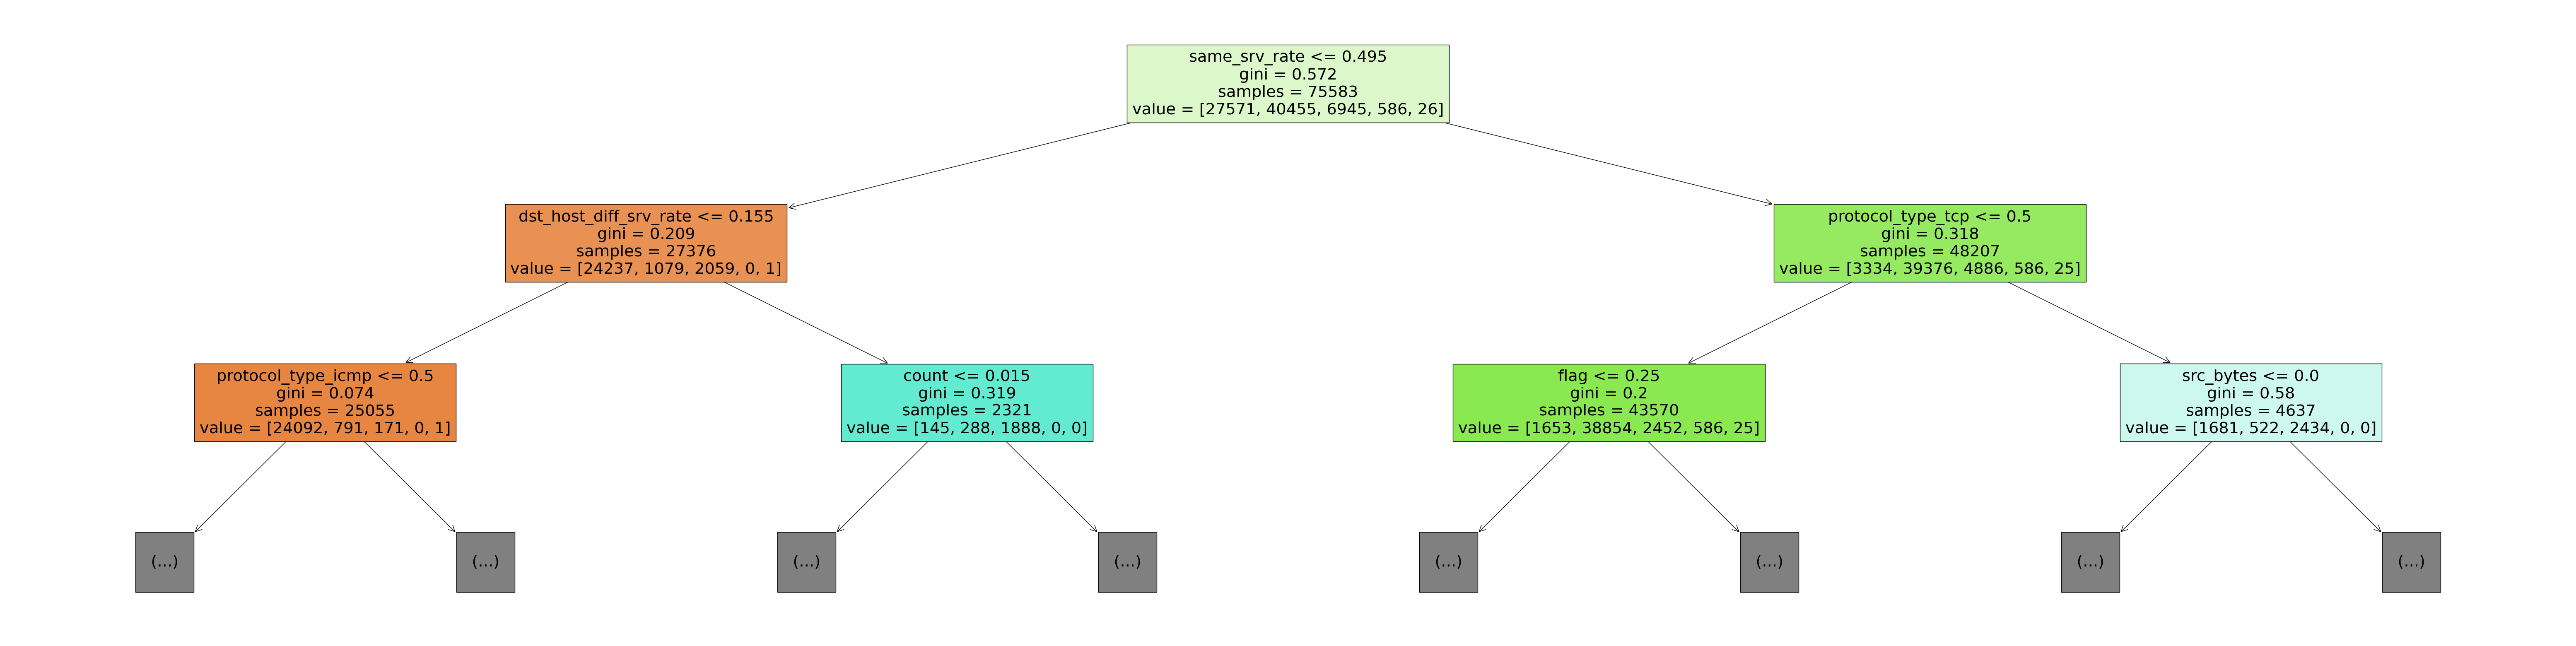

In [ ]:
from sklearn.tree import plot_tree, export_text

plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [ ]:
model.tree_.max_depth

33

In [ ]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- same_srv_rate <= 0.50
|   |--- dst_host_diff_srv_rate <= 0.16
|   |   |--- protocol_type_icmp <= 0.50
|   |   |   |--- dst_host_rerror_rate <= 0.00
|   |   |   |   |--- dst_host_same_src_port_rate <= 0.90
|   |   |   |   |   |--- diff_srv_rate <= 0.03
|   |   |   |   |   |   |--- dst_host_same_src_port_rate <= 0.34
|   |   |   |   |   |   |   |--- class: probe
|   |   |   |   |   |   |--- dst_host_same_src_port_rate >  0.34
|   |   |   |   |   |   |   |--- class: normal
|   |   |   |   |   |--- diff_srv_rate >  0.03
|   |   |   |   |   |   |--- class: normal
|   |   |   |   |--- dst_host_same_src_port_rate >  0.90
|   |   |   |   |   |--- same_srv_rate <= 0.00
|   |   |   |   |   |   |--- dst_host_srv_diff_host_rate <= 0.50
|   |   |   |   |   |   |   |--- class: normal
|   |   |   |   |   |   |--- dst_host_srv_diff_host_rate >  0.50
|   |   |   |   |   |   |   |--- class: probe
|   |   |   |   |   |--- same_srv_rate >  0.00
|   |   |   |   |   |   |--- class: probe
|   |   |   |-

In [ ]:
model.feature_importances_

array([1.71019572e-02, 4.71063436e-02, 5.22893087e-02, 5.79684903e-03, 0.00000000e+00, 2.05088764e-02, 4.38061043e-05, 4.23863506e-03, 6.61594759e-04, 1.00714466e-02, 1.62752040e-02, 1.34415512e-04,
       4.49302988e-05, 1.49070622e-04, 7.40361376e-05, 4.39880224e-05, 1.80252566e-04, 0.00000000e+00, 0.00000000e+00, 2.64318478e-04, 8.58824054e-03, 2.97437846e-04, 3.98975004e-04, 8.76743734e-05,
       7.00289722e-04, 4.68870619e-05, 5.19163942e-01, 6.26607663e-03, 8.07792678e-05, 2.20370635e-02, 2.14419453e-02, 1.10261364e-03, 8.77692299e-02, 1.55186719e-02, 6.52555822e-03, 1.15592060e-02,
       1.29056144e-03, 7.58058527e-03, 7.85564433e-04, 2.30203261e-02, 9.03973117e-02, 3.56027472e-04])

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
26,same_srv_rate,0.519164
40,protocol_type_tcp,0.090397
32,dst_host_diff_srv_rate,0.087769
2,src_bytes,0.052289
1,flag,0.047106
39,protocol_type_icmp,0.023020
29,dst_host_count,0.022037
30,dst_host_srv_count,0.021442
5,wrong_fragment,0.020509
0,service,0.017102


In [ ]:
import seaborn as sns

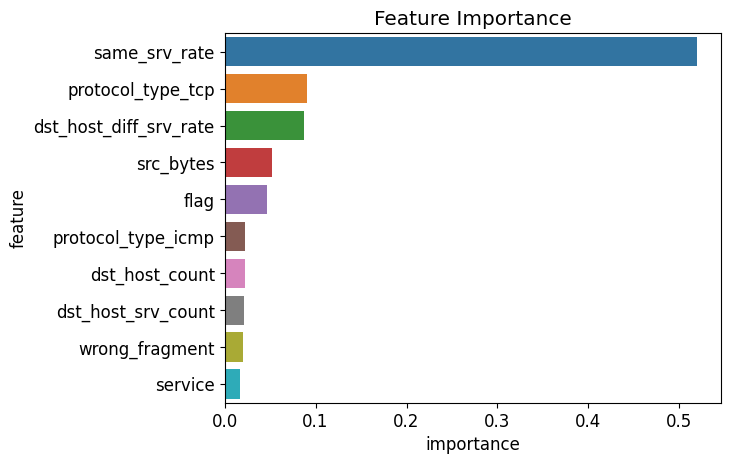

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [ ]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
model.fit(X_train, train_targets)

model.score(X_train, train_targets)

0.9326965058280301

In [ ]:
model.score(X_val, val_targets)

0.9308592974796587

In [ ]:
model.classes_

array(['dos', 'normal', 'probe', 'r2l', 'u2r'], dtype=object)

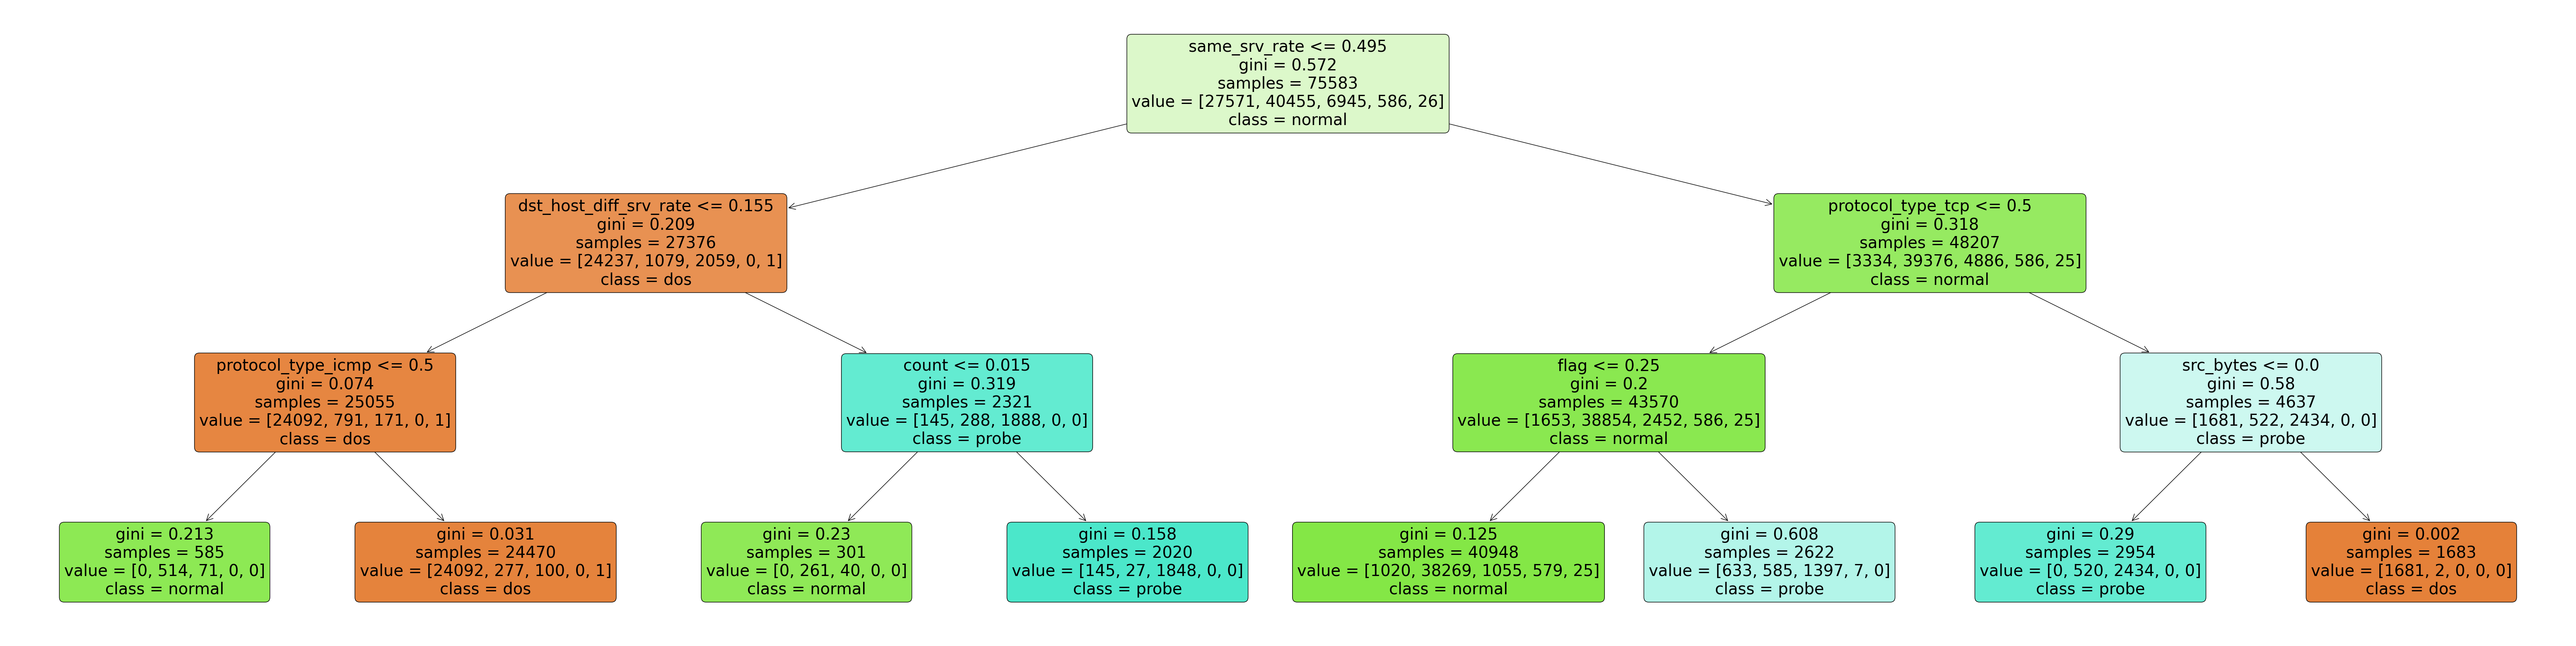

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [ ]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- same_srv_rate <= 0.50
|   |--- dst_host_diff_srv_rate <= 0.16
|   |   |--- protocol_type_icmp <= 0.50
|   |   |   |--- class: normal
|   |   |--- protocol_type_icmp >  0.50
|   |   |   |--- class: dos
|   |--- dst_host_diff_srv_rate >  0.16
|   |   |--- count <= 0.01
|   |   |   |--- class: normal
|   |   |--- count >  0.01
|   |   |   |--- class: probe
|--- same_srv_rate >  0.50
|   |--- protocol_type_tcp <= 0.50
|   |   |--- flag <= 0.25
|   |   |   |--- class: normal
|   |   |--- flag >  0.25
|   |   |   |--- class: probe
|   |--- protocol_type_tcp >  0.50
|   |   |--- src_bytes <= 0.00
|   |   |   |--- class: probe
|   |   |--- src_bytes >  0.00
|   |   |   |--- class: dos



In [ ]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [ ]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: user 16 s, sys: 0 ns, total: 16 s
Wall time: 16.1 s


In [ ]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.158369,0.161262
1,2,0.110012,0.112165
2,3,0.067303,0.069141
3,4,0.041411,0.042508
4,5,0.029226,0.029768
5,6,0.020481,0.020996
6,7,0.018536,0.019051
7,8,0.015440,0.015638
8,9,0.010902,0.011510
9,10,0.009010,0.010359


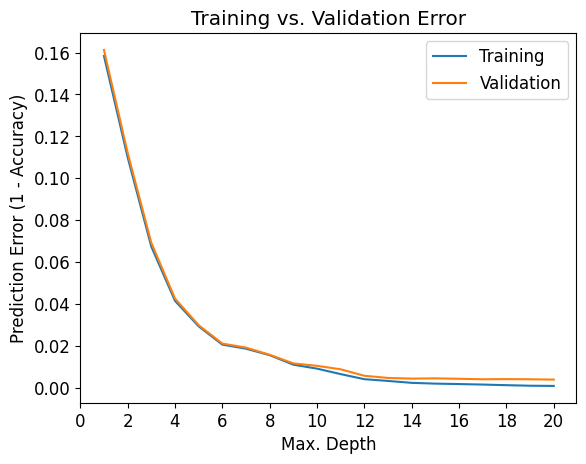

In [ ]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [ ]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.9809486009128795

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
%%time
model.fit(X_train, train_targets)

CPU times: user 10.5 s, sys: 16.4 ms, total: 10.5 s
Wall time: 5.62 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model.score(X_train, train_targets)

0.999920617069976

In [ ]:
model.score(X_val, val_targets)

0.9977376463584045

In [ ]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)

In [ ]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [ ]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9997221597449162, 0.9976185751141099)

In [ ]:
model.score(X_test, test_targets)

0.9967850764040485